## Replace this text with your name

In the cell below, include **all** your ``import`` statements

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Solve projectile motion with air resistance,

$$ \frac{d}{dt} \left( \begin{array}{c} x \\ y \\ v_x \\ v_y \end{array} \right) = \left( \begin{array}{c} v_x \\ v_y \\ - b v_x \\ - 9.8 -  b v_y \end{array} \right) $$

with $b = 0.1$ and initial conditions, (x, y, vx, vy) = (0, 0, 30, 40). You should use:
- a function whose inputs are
    -  an array of the dependent variables
    -  $\Delta t$
    -  the function that takes the array of inputs and $b$ and outputs the derivative
    -  $b$
- and whose output is an array of the dependent variables after taking a step.

Calculate the motion and create a plot of the trajectory, y vs. x

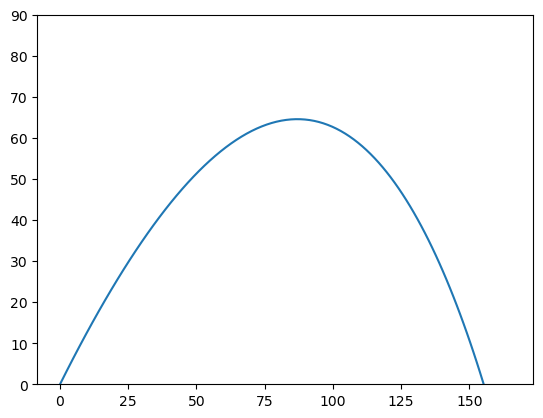

In [5]:
def graph_x_vs_y(b):
    def new_der(x_in, b):
        x, y, vx, vy = x_in
        g = 9.8
        ax = (-b)*vx
        ay = (-g)-(b*(vy))
        
        derivative = np.zeros(4)
        derivative[:] = [vx, vy, ax, ay]
        return derivative

    def new_time_step(x_in, dt, der, b):
        k1 = new_der(x_in, b) * dt
        k2 = new_der(x_in + k1, b) * dt
        
        x_final = x_in + 0.5 * (k1 + k2)
        return x_final
    
    time = np.linspace(0,8,100)
    dt = time[1] - time[0]
    x_step = np.zeros(len(time))
    y_step = np.zeros(len(time))
    
    x = 0
    y = 0
    vx = 30
    vy = 40
    x_array = np.zeros(4)
    x_array[:] = [x, y, vx, vy]
    
    x_step[0] = x_array[0]
    y_step[0] = x_array[1]
    
    for i in range(1,len(time)):
        x_array = new_time_step(x_array, dt, new_der, b)
        x_step[i] = x_array[0]
        y_step[i] = x_array[1]
        
    plt.figure()
    plt.plot(x_step, y_step)
    plt.ylim(0,90)
    plt.show()


graph_x_vs_y(0.1)

**Exercise:** The Moon's orbit. We can consider the orbit of the Moon around the Earth with the differential equation
$$\displaystyle \frac{dx}{dt} = v_x \qquad \qquad \frac{d v_x}{dt} = a_x = - \frac{G M}{(x^2+y^2)^{3/2}} x$$
$$\displaystyle \frac{dy}{dt} = v_y \qquad \qquad \frac{d v_y}{dt} = a_y = - \frac{G M}{(x^2+y^2)^{3/2}} y$$
Here, $G M$ is the product of Newton's gravitational constant, $G$, and the mass of the Earth, $M$. With the initial conditions $(x, y) = (R, 0)$ and $(v_x, v_y) = (0, 1.1v)$. 
- Plot y vs. x. On your plot, add a point for the Earth, and make sure the plot is square with even limits for x and y.
- Plot energy vs time.

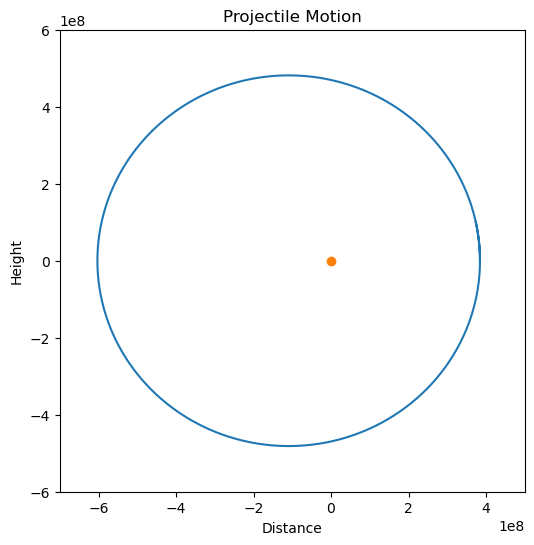

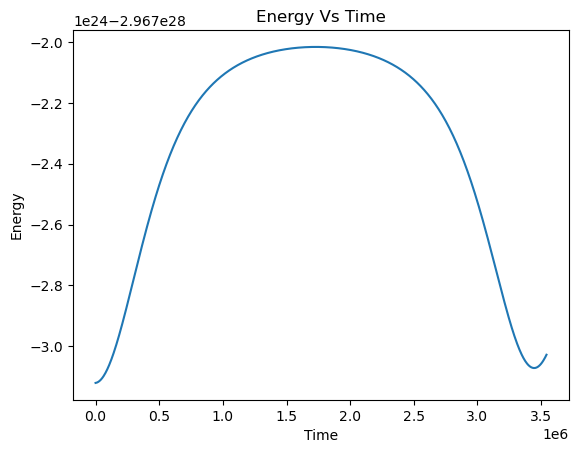

In [7]:
def der_motion(x_in):
    x, y, vx, vy = x_in

    G = 6.674 * (10**((-11)))
    M = 5.972 * (10**24)

    ax = (-G*M*x)/(((x**2)+(y**2))**(3/2))
    ay = (-G*M*y)/(((x**2)+(y**2))**(3/2))
    
    derivative = np.zeros(4)
    derivative[:] = [vx, vy, ax, ay]
    return derivative



def time_step1(x_in, dt):
    k1 = der_motion(x_in) * dt
    k2 = der_motion(x_in + k1) * dt
    
    x_final = x_in + 0.5 * (k1 + k2)
    return x_final
    
def E(x_in):
    x, y, vx, vy = x_in
    G = 6.674 * (10**((-11)))
    M = 5.972 * (10**24)
    m = 7.35 * (10**22) 
    
    return ((1/2)*m*((vx**2)+(vy**2)))-((G*M*m))/(((x**2)+(y**2))**(1/2))

time_m = np.linspace(0,3542400,1000)
dt = time_m[1]-time_m[0]
x_step = np.zeros(len(time_m))
y_step = np.zeros(len(time_m))

x_step1 = np.zeros(len(time_m))
y_step1 = np.zeros(len(time_m))

x = 384400 * (10**3)
y = 0
vx = 0
vy = (1.1)*1023 

x_array = np.zeros(4)
x_array[:] = [x, y, vx, vy]
    
x_step[0] = x_array[0]
y_step[0] = x_array[1]
y_step1[0] = E(x_array)

       
for i in range(1,len(time_m)):
    x_array = time_step1(x_array, dt)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]
    y_step1[i] = E(x_array)

plt.figure(figsize=(6,6))
plt.xlabel("Distance")
plt.ylabel("Height")
plt.title("Projectile Motion")
plt.plot(x_step, y_step)
plt.plot(0, 0, 'o')
plt.xlim(-7*10**8, 5*10**8)
plt.ylim(-6*10**8,6*10**8)
plt.show()

plt.figure()
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Energy Vs Time")
plt.plot(time_m, y_step1)

Confirm that this all works by using ``Kernel > Restart Kernel and Run All Cells...``

When you are happy with your results, you will submit by uploading this file on Github.